# Neural network development for turbulence modeling in URANS simulations of non-Newtonian media slope flows

URANS mathematical model:
\begin{equation}
	\label{vof}
	\left\{
		\begin{aligned}
			&\boldsymbol{\nabla} \cdot \bar{\boldsymbol{u}} = 0,\\
			&\frac{\partial \bar{\alpha}}{\partial t} + \boldsymbol{\nabla} \cdot (\bar{\boldsymbol{u}} \bar{\alpha}) = 0,\\
			&\frac{\partial (\rho \bar{\boldsymbol{u}})}{\partial t} + \boldsymbol{\nabla} \cdot (\rho \bar{\boldsymbol{u}} \bar{\boldsymbol{u}}) = -\boldsymbol{\nabla} \bar{p} + \boldsymbol{\nabla} \cdot \bar{\boldsymbol{\tau}} + \rho \bar{\boldsymbol{f}}.
		\end{aligned}
	\right.
\end{equation}
Here $\bar{\boldsymbol{u}}$ is the speed of the mixture, horizontal bar means Reynolds averaging, $\bar{\alpha}$ is the volume fraction of the selected phase, $\bar{\boldsymbol{\tau}} = \bar{\boldsymbol{\tau}}_{Re} + \bar{\boldsymbol{\tau}}_m$ is the stress tensor calculated as sum of Reynolds stress tensor and viscous stress tensor, $\bar{\boldsymbol{\tau}}_m = 2 \mu \bar{\boldsymbol{s}}$ is the viscous stress tensor, which is a function of the strain rate tensor $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$, $\mu = \nu \rho$ is dynamic viscosityof a mixture which is calculated as a product of density and kinematic viscosity of mixture, $\nu = \nu_1 \bar{\alpha} + \nu_0 (1 -\bar{\alpha})$ is the kinemsatic viscosity of mixture calculated according to the principle of the weighted average, $\nu_0$ is a constant, $\nu_1 = min (\nu_*, (\tau_* + K \dot{\gamma}^n) / \dot{\gamma})$ is Herschel-Bulkley reology ratio, $\rho = \rho_1 \bar{\alpha} + \rho_0 (1 - \bar{\alpha})$ is the mixture density, $\rho_0$ and $\rho_1$ are constants, $\bar{p}$ is the pressure, $\bar{\boldsymbol{f}}$ is the density of the body forces.

The $\bar{\boldsymbol{\tau}}_{Re}$ Reynolds stress tensor is calculetaed using Tensor Basis Neural Network (TBNN) according to the principle presented in the work of Pope [1]. It is presented as function of strain rate $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ and rotation rate $\bar{\boldsymbol{r}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} - (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ tensors, and 10 their isotropic combinations $T^i$ and 5 invariants $\lambda_i$. Calculations performed for normalized tensors $\bar{\tau}_{Re}'$, $\bar{\boldsymbol{s}}'$, $\bar{\boldsymbol{r}}'$. The scaling parameters $U_0$, $h_0$, $\rho$ used for normalization:

\begin{equation}
	\label{norm}
	\left\{
		\begin{aligned}
			&\bar{\boldsymbol{\tau}}_{Re} = \bar{\boldsymbol{\tau}}_{Re}' \rho U_0 h_0,\\
			&\bar{\boldsymbol{s}} = \bar{\boldsymbol{s}}' U_0^2 / h_0,\\
			&\bar{\boldsymbol{r}} = \bar{\boldsymbol{r}}' U_0^2 / h_0.
		\end{aligned}
	\right.
\end{equation}

In what follows, we omit the apostrophe symbol and keep in mind that we are considering normalized tensors.

Normalized Reynolds stress tensor is

\begin{equation}
	\label{MLReynolds}
	\bar{\boldsymbol{\tau}}_{Re} = \sum\limits_{n=1}^{10} g^{(n)} (\lambda_1, ... , \lambda_5) \boldsymbol{T}^{(n)}.
\end{equation}

\begin{equation}
	\begin{aligned}
		&\boldsymbol{T}^{(1)} = \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(6)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} + \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \frac{2}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(2)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} - \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(7)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} \bar{\boldsymbol{r}},\\
		&\boldsymbol{T}^{(3)} = \bar{\boldsymbol{s}}^2 - \frac{1}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2),
		&&\boldsymbol{T}^{(8)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},\\
		&\boldsymbol{T}^{(4)} = \bar{\boldsymbol{r}}^2 - \frac{1}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{r}}^2),
		&&\boldsymbol{T}^{(9)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 + \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \frac{2}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(5)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
		&&\boldsymbol{T}^{(10)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
	\end{aligned}
\end{equation}
\begin{equation}
	\lambda_1 = Tr(\bar{\boldsymbol{s}}^2),\ \ \ \ \lambda_2 = Tr(\bar{\boldsymbol{r}}^2),\ \ \ \ \lambda_3 = Tr(\bar{\boldsymbol{s}}^3),\ \ \ \ \lambda_4 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}),\ \ \ \ \lambda_5 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2).
\end{equation}

Calculations performed for turbulent flow in inclined chute with the rectangular cross-section. Scheme of flow is shown in figure below.

<div>
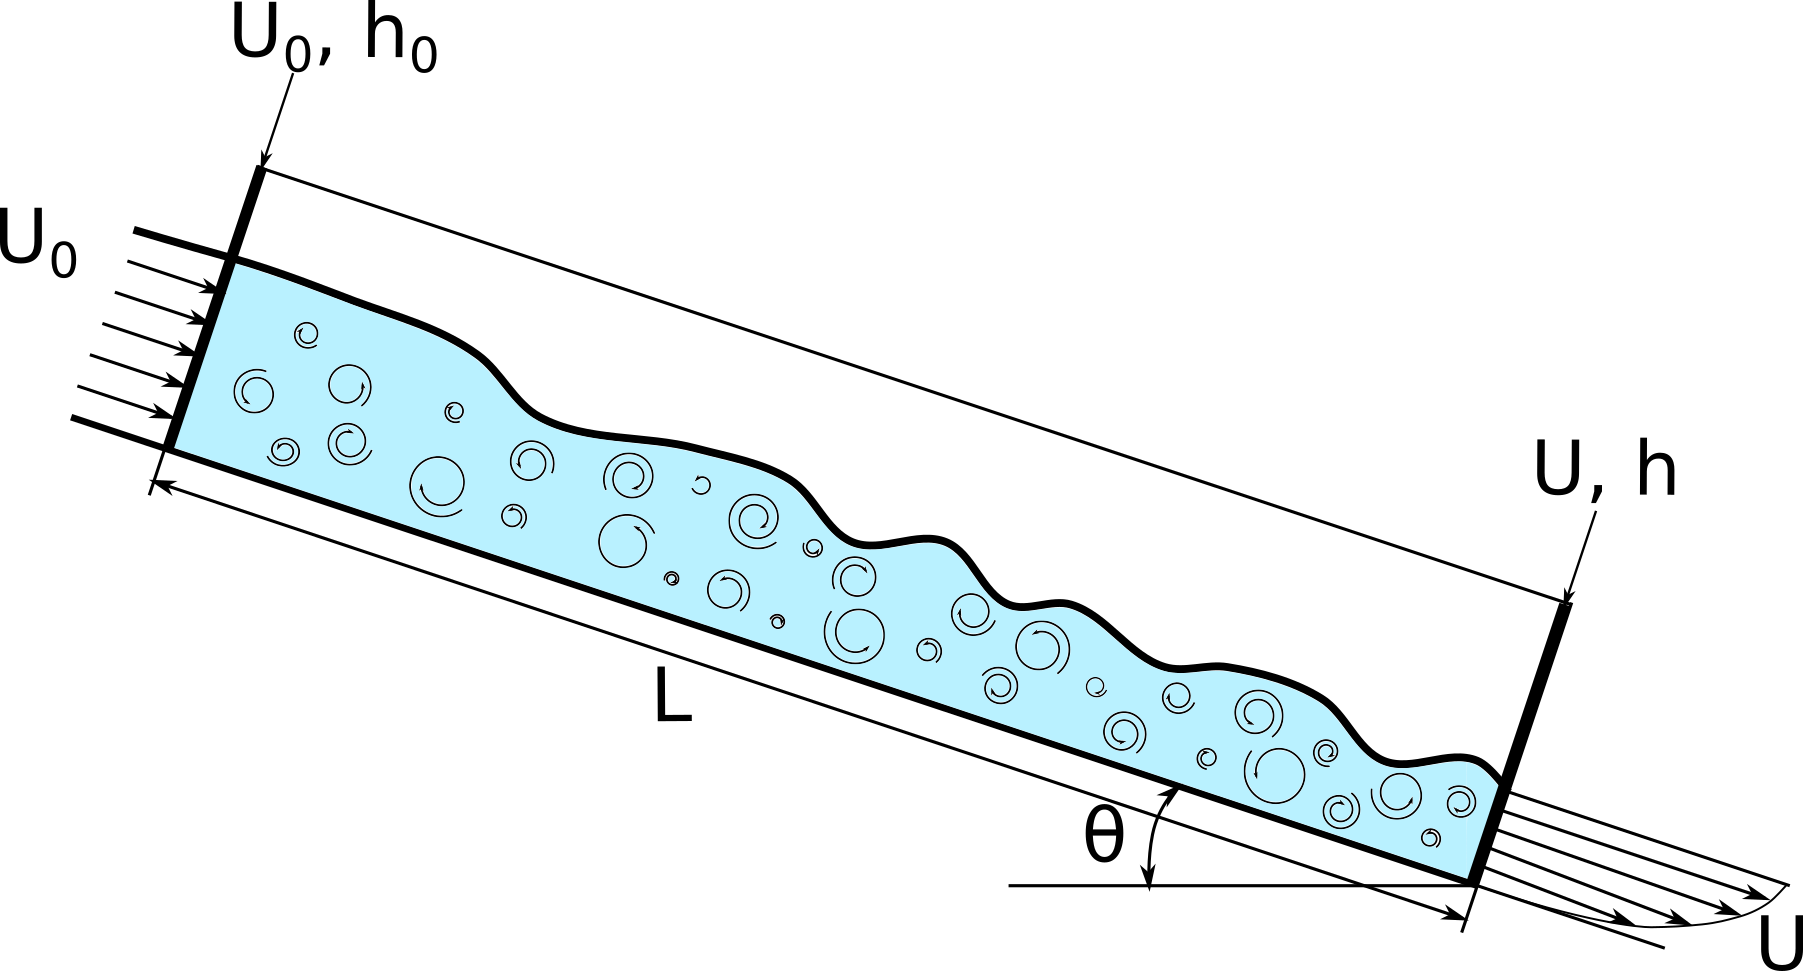
</div>

In the considered flow
\begin{equation}
    U_0 = 0.4\ \text{m}/\text{s},\ \ \ h_0 = 0.01\ \text{m},\ \ \ \theta = 25^\circ,\ \ \ L = 0.1\ \text{m}.
\end{equation}

Reynolds number of flow is 
\begin{equation}
    \text{Re} = U_0 h_0 / \nu_{eff},
\end{equation}

\begin{equation}
    \nu_{eff} = \frac{\tau_* + K (U_0/h_0)^n}{\rho (U_0 / h_0)}.
\end{equation}

Constants in calculation are set as follows:

\begin{equation}
    \nu_* = 10^7\ \text{m}^2/\text{s},\ \ \ \tau_* = 2 \cdot 10^{-3}\ \text{m}^2/\text{s}^2,\ \ \ K = 10^{-4}\ \text{m}^2/\text{s},\ \ \ n = 0.8,\ \ \ \rho = 100\ \text{kg}/\text{m}^3.
\end{equation}

So effective viscosity and Reynolds number are:

\begin{equation}
    \nu_{eff} = 10^{-6}\ \text{m}^2/\text{s},\ \ \ \text{Re} = 4000.
\end{equation}

The mesh cell linear size must be $dx = \frac{h_0}{\text{Re}^{3/4}} = 2 \cdot 10^{-5}$. Time step $dt = 5 \cdot 10^{-5}$.

Mesh size for computational domain size of 0.1x0.011x0.002 m$^3$ is $27.5 \cdot 10^7$.

[1] S. B. Pope. A more general effective-viscosity hypothesis.Journal of Fluid Mechanics,72(2):331–340, 1975.

## Current research

Above was global formulation for TBNN (Tensor Based Neural Network) with implemengtation into mathematical model. Now let's try to realize ML-turbulence model as a correction step for variables $\bar{\boldsymbol{u}}$, $\bar{\alpha}$, $\bar{p}$.

Will use tensors $\boldsymbol{T}^{(i)}$, invariants $\lambda_i$ and variables $\bar{\boldsymbol{u}}$, $\bar{p}$, $\bar{\alpha}$ as a features of NN (Neural Network). As a targets will be the differenses between DNS and RANS values for $\boldsymbol{u}$, $\alpha$ and $p$.

Let's start with importing libraries.

In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-gv9fgl4h
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-gv9fgl4h
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=151722 sha256=875ae651f126d2d583d6b2c8e816588fd4e6d1d71d84a9fc9aabc7b1a13786f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-ynywx1xx/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

print(tf.__version__)

2.7.0


In [3]:
def timeStepsList():
	timeStepsList = np.loadtxt("timeStepsList.txt", dtype=str)
	index = np.argsort(timeStepsList.astype(np.float))
	timeStepsList = timeStepsList[index]
	return timeStepsList[1:-2]

In [4]:
def readTensor(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'3', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
#	return arr
	return arr[[fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'8']]

In [5]:
def readVector(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr

In [6]:
def readScalar(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.columns = [fileName[0]]
	arr.loc[:] = arr.loc[:].astype(float)
	return arr

In [7]:
def formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size):
	data = pd.DataFrame()
	for time in TSL:
		kwargs = {'folder':folder, 'time':time, 'sz':size}
		scalars = FsScalars.apply(readScalar, axis=1, **kwargs)
		vectors = FsVectors.apply(readVector, axis=1, **kwargs)
		tensors = FsTensors.apply(readTensor, axis=1, **kwargs)
		tmp = pd.concat(list(scalars[:])+list(vectors[:])+list(tensors[:]), axis=1)
		data = data.append(tmp, ignore_index=True)
	return data

Below all fiatures listed. alpha.water is $\bar{\alpha}$, 'alpha.water', 'U' and 'p_rgh' are initial values. Parameters from res/ folder are calculated without turbulence model using base interFoam solver. 'Uref', 'AWref' and 'p_rghref' are reference values calculated using DNS data.

In [8]:
TSL = timeStepsList()
lenTSL = len(TSL)
folder = 'TIF'
deltaT = 1e-06
size = 27500
FsScalars = pd.DataFrame([['alpha.water'], ['res/alpha.water'], ['res/AWref'], ['p_rgh'], ['res/p_rgh'],\
                          ['res/p_rghref'], ['res/I0'], ['res/I1'], ['res/I2'], ['res/I3'], ['res/I4']])
FsVectors = pd.DataFrame([['U'], ['res/U'], ['res/Uref']])
FsTensors = pd.DataFrame([['res/T0'], ['res/T1'], ['res/T2'], ['res/T3'], ['res/T4'], ['res/T5'], \
                          ['res/T6'], ['res/T7'], ['res/T8'], ['res/T9']])#, ['res/rotationRateTensor']])

In [9]:
data = formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size)
data['dU0'] = data['res/Uref0'] - data['res/U0']
data['dU1'] = data['res/Uref1'] - data['res/U1']
data['dU2'] = data['res/Uref2'] - data['res/U2']
data['dAW'] = data['res/AWref'] - data['res/alpha.water']
data['dp'] = data['res/p_rghref'] - data['res/p_rgh']
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alpha.water,495000.0,1.710641e-01,0.366329,-1.838194e-20,0.000000e+00,0.000000e+00,1.107361e-159,1.000000
res/alpha.water,495000.0,1.710647e-01,0.366330,-6.426015e-19,0.000000e+00,0.000000e+00,2.206284e-144,1.000000
res/AWref,495000.0,1.710647e-01,0.366330,-1.843787e-20,0.000000e+00,0.000000e+00,1.110486e-159,1.000000
p_rgh,495000.0,2.120728e+01,62.060046,-1.048988e+01,-9.477217e-05,6.374967e-06,2.780113e-04,578.659922
res/p_rgh,495000.0,3.406507e+01,19.675851,-6.301702e+00,1.615794e+01,3.513661e+01,5.208738e+01,148.217470
...,...,...,...,...,...,...,...,...
dU0,495000.0,-5.014021e-04,0.000472,-2.139372e-03,-8.419437e-04,-7.234426e-04,-2.292963e-04,0.010376
dU1,495000.0,-6.488233e-08,0.000085,-3.815120e-03,-1.894498e-08,-1.100109e-10,2.020972e-08,0.003815
dU2,495000.0,9.954792e-06,0.000112,-9.443523e-04,-1.533164e-06,1.244607e-06,1.160951e-05,0.005905
dAW,495000.0,-4.771698e-09,0.000003,-5.999194e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000057


In [10]:
features = data.copy()
labels = features[['dU0', 'dU1', 'dU2', 'dAW', 'dp']].copy()
features = features.drop(['dU0', 'dU1', 'dU2', 'dAW', 'dp'], axis=1)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,\
                                                                            test_size=0.33, random_state=42)

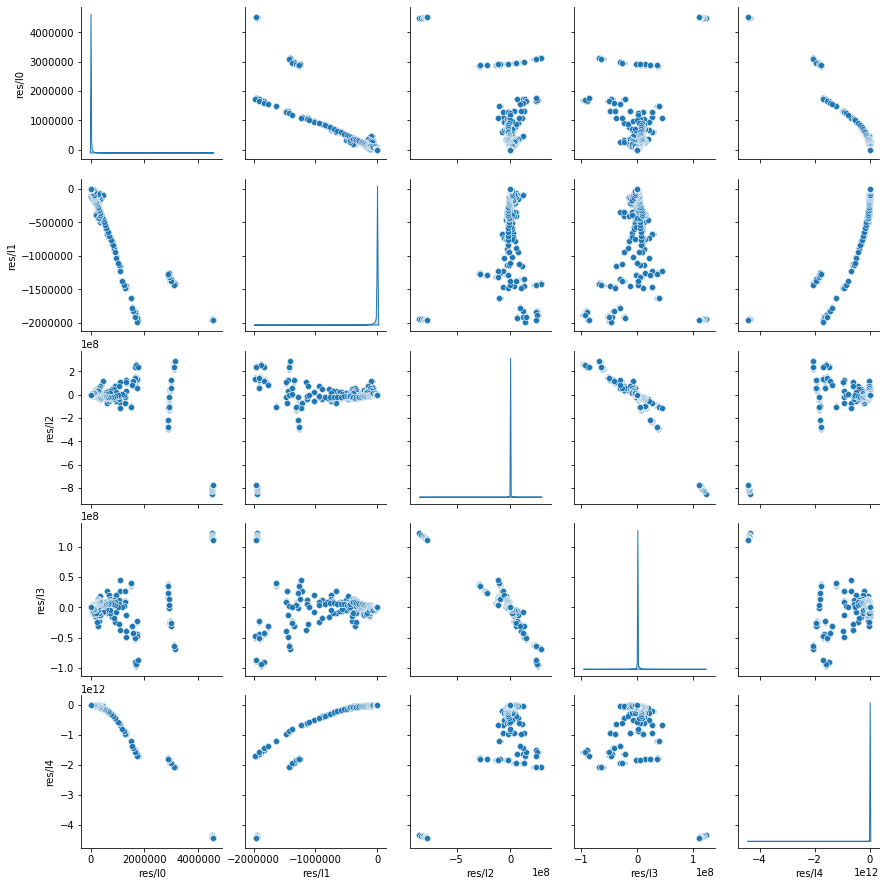

In [11]:
sns.pairplot(data[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']], diag_kind='kde')

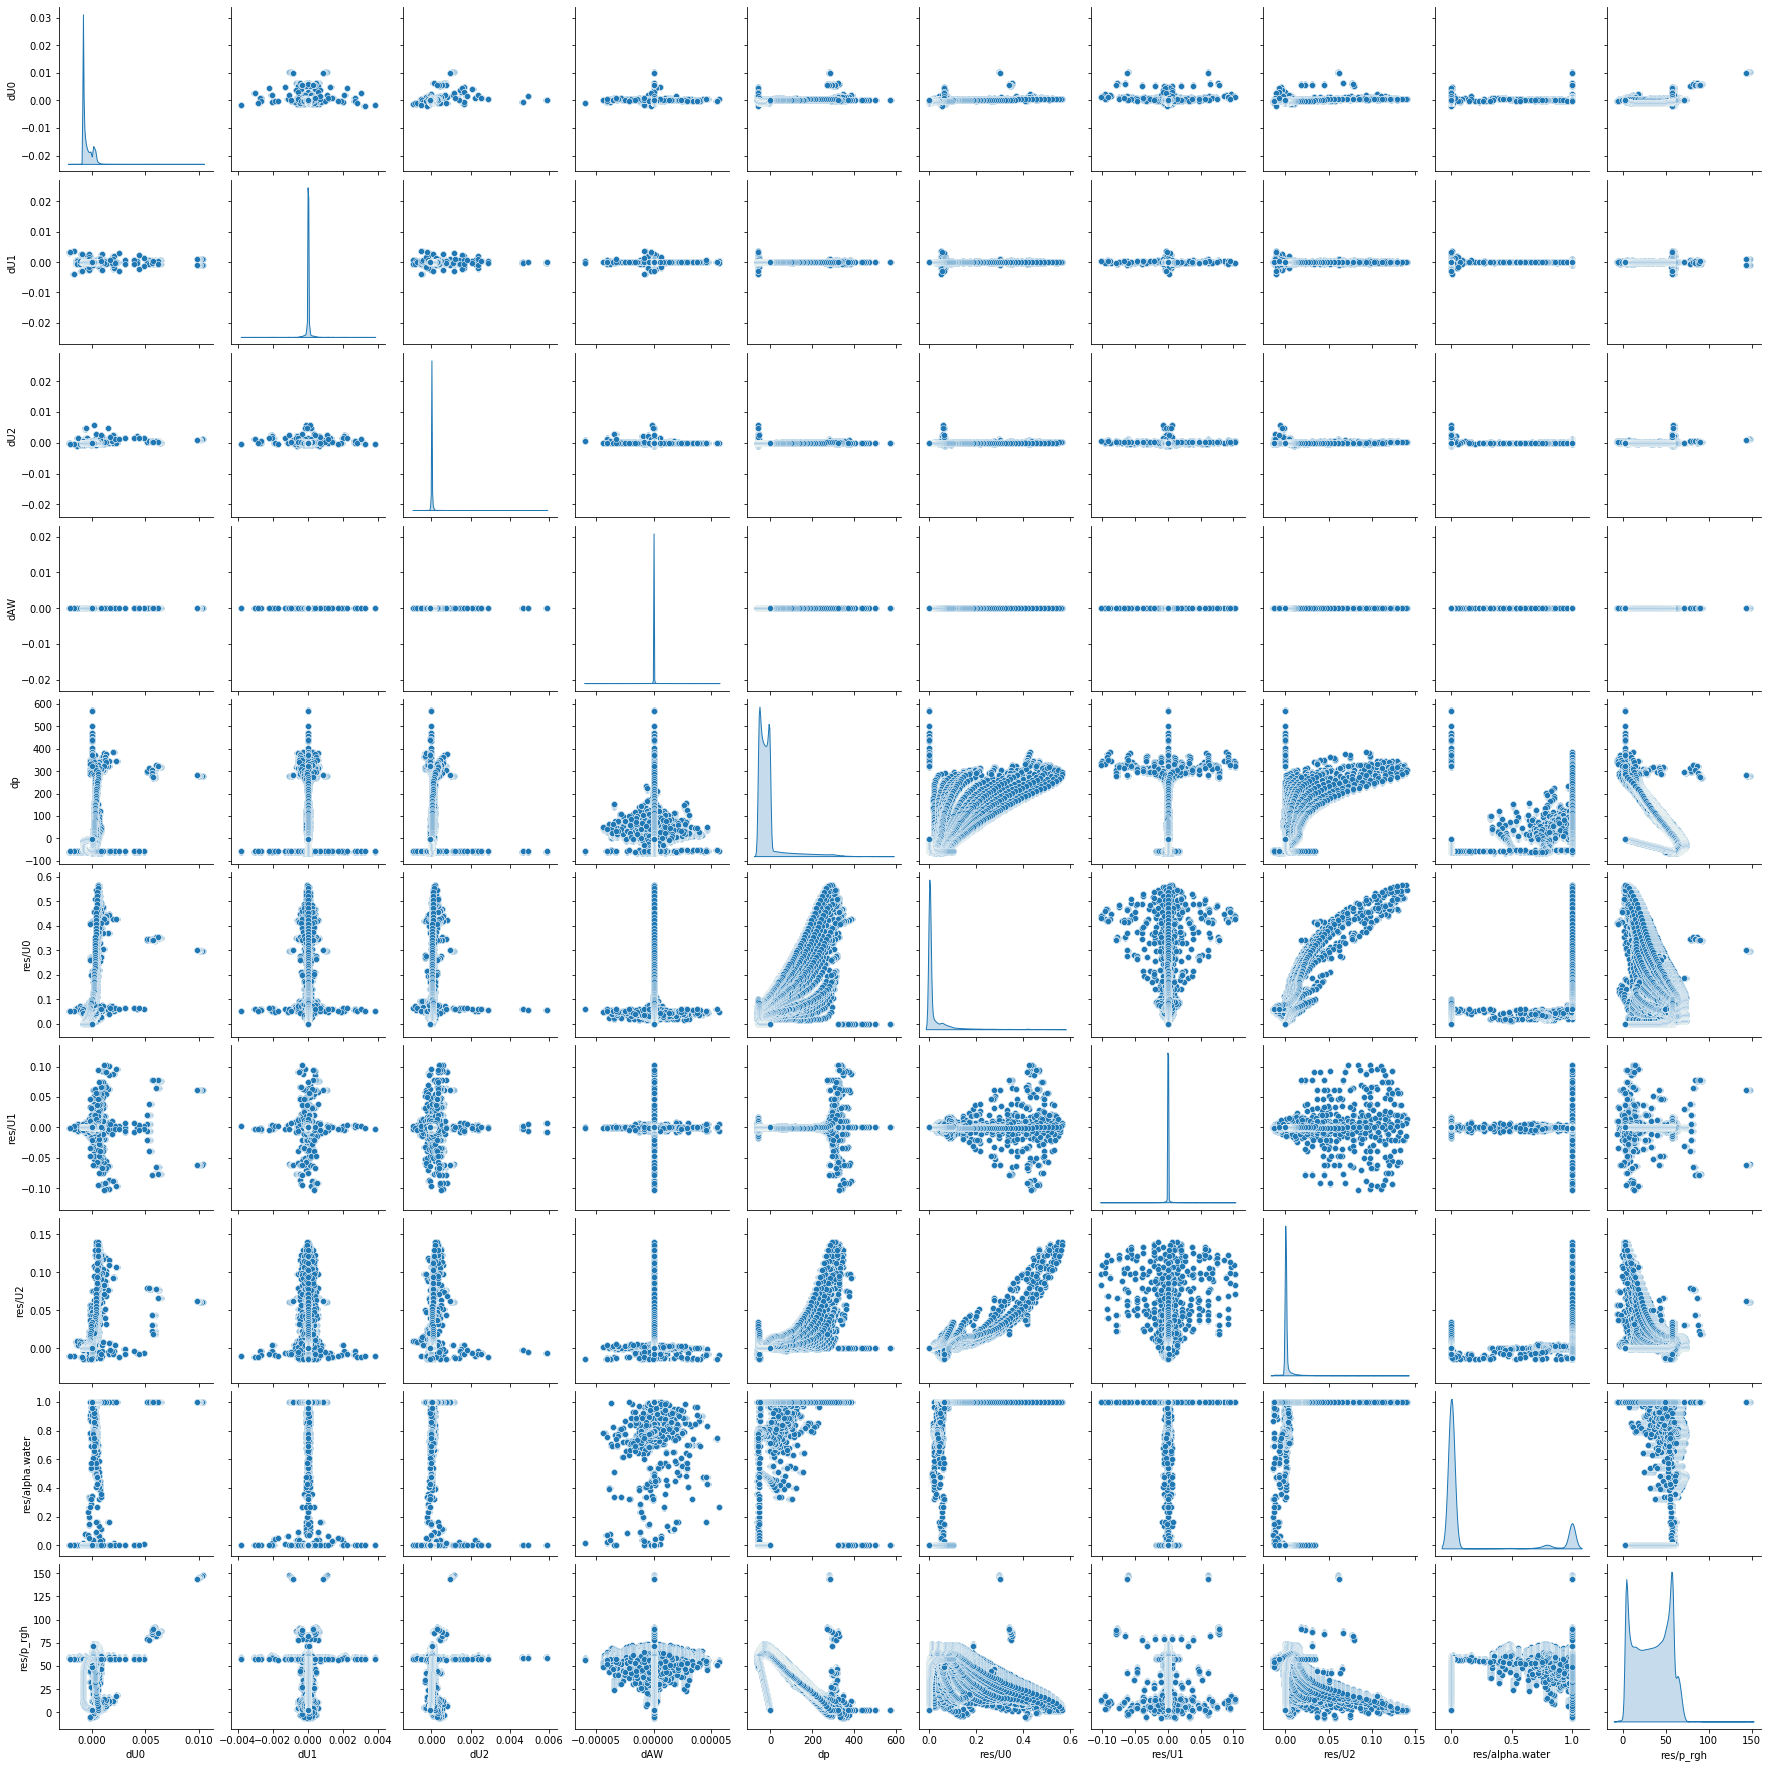

In [12]:
sns.pairplot(data[['dU0', 'dU1', 'dU2', 'dAW', 'dp',\
                   'res/U0', 'res/U1', 'res/U2', 'res/alpha.water', 'res/p_rgh']], diag_kind='kde')

In [13]:
dU0TargetCorr = data.corr()['dU0']
print(dU0TargetCorr.abs().sort_values()[:10])
print(dU0TargetCorr.abs().sort_values()[-10:])

res/T85    0.000147
dAW        0.001587
res/T95    0.002859
res/T75    0.002960
dU1        0.004175
res/T65    0.004697
res/T98    0.005317
res/T15    0.005663
res/T41    0.006244
res/T81    0.007793
Name: dU0, dtype: float64
res/T02            0.565214
res/U0             0.654729
res/Uref0          0.658726
U0                 0.658729
p_rgh              0.670630
res/p_rghref       0.670658
alpha.water        0.760991
res/AWref          0.760992
res/alpha.water    0.760992
dU0                1.000000
Name: dU0, dtype: float64


In [14]:
dU1TargetCorr = data.corr()['dU1']
print(dU1TargetCorr.abs().sort_values()[:10])
print(dU1TargetCorr.abs().sort_values()[-10:])

res/T98    0.000005
res/T78    0.000306
res/T52    0.000348
res/T58    0.000363
res/T70    0.000399
res/T68    0.000409
res/T42    0.000461
res/T18    0.000485
res/T92    0.000737
res/T02    0.000750
Name: dU1, dtype: float64
res/T51    0.038781
res/U1     0.042137
res/T85    0.061926
res/T71    0.070027
res/T95    0.077469
res/T75    0.098911
res/T91    0.113711
res/T45    0.116506
res/T05    0.175368
dU1        1.000000
Name: dU1, dtype: float64


In [15]:
dU2TargetCorr = data.corr()['dU2']
print(dU2TargetCorr.abs().sort_values()[:10])
print(dU2TargetCorr.abs().sort_values()[-10:])

res/T95    0.000165
res/T85    0.000341
res/T75    0.000557
res/T15    0.000676
res/T41    0.000852
res/T81    0.001051
res/T91    0.002030
res/T65    0.002249
res/T45    0.002842
res/T71    0.005629
Name: dU2, dtype: float64
res/T20         0.159454
U2              0.167706
res/Uref2       0.167711
p_rgh           0.197635
res/p_rghref    0.197638
res/U0          0.211055
res/Uref0       0.212128
U0              0.212131
dU0             0.291618
dU2             1.000000
Name: dU2, dtype: float64


In [16]:
dAWTargetCorr = data.corr()['dAW']
print(dAWTargetCorr.abs().sort_values()[:10])
print(dAWTargetCorr.abs().sort_values()[-10:])

res/T61    2.204159e-07
res/T71    7.722886e-07
res/T94    1.183533e-06
res/T95    1.524683e-06
res/T84    2.750285e-06
res/T62    3.305691e-06
res/T91    3.723665e-06
res/T75    4.530098e-06
res/T85    5.466169e-06
res/T65    8.151252e-06
Name: dAW, dtype: float64
res/Uref2          0.005558
U2                 0.005564
p_rgh              0.005678
res/p_rghref       0.005678
res/T02            0.006981
alpha.water        0.013205
res/alpha.water    0.013205
res/AWref          0.013213
dU2                0.087392
dAW                1.000000
Name: dAW, dtype: float64


In [17]:
dpTargetCorr = data.corr()['dp']
print(dpTargetCorr.abs().sort_values()[:10])
print(dpTargetCorr.abs().sort_values()[-10:])

res/T95    0.000057
res/T85    0.001248
res/T75    0.001304
res/T41    0.001971
res/T65    0.003477
res/T91    0.003644
res/T81    0.004352
dAW        0.004761
res/T45    0.005632
res/T94    0.006904
Name: dp, dtype: float64
res/T02         0.590201
res/U2          0.643606
U2              0.644046
res/Uref2       0.644051
res/U0          0.746508
U0              0.746981
res/Uref0       0.746986
res/p_rghref    0.954411
p_rgh           0.954427
dp              1.000000
Name: dp, dtype: float64


In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

I0 correlates good with dU0

In [19]:
I0 = np.array(train_features['res/I0'])
I0_normalizer = layers.Normalization(input_shape=[1,], axis=None)
I0_normalizer.adapt(I0)

In [20]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [21]:
dnn_I0_model = build_and_compile_model(I0_normalizer)

In [22]:
dnn_I0_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [23]:
%%time
history_dnn_I0 = dnn_I0_model.fit(
    train_features['res/I0'],
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=20)

CPU times: user 2min 21s, sys: 15.6 s, total: 2min 37s
Wall time: 1min 35s


In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

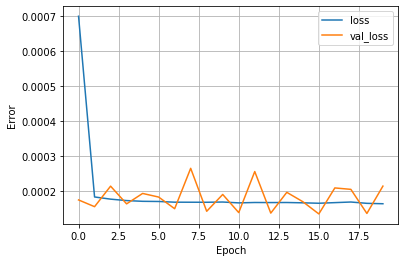

In [25]:
plot_loss(history_dnn_I0)

In [26]:
data['res/I0'].describe()

count    4.950000e+05
mean     1.506977e+04
std      1.117253e+05
min      8.794476e-05
25%      1.728243e-02
50%      9.602778e+00
75%      4.979044e+02
max      4.535104e+06
Name: res/I0, dtype: float64

In [27]:
x = tf.linspace(0., 6000000., 101)
y = dnn_I0_model.predict(x)

In [28]:
def plot_I0(x, y):
  plt.scatter(train_features['res/I0'], train_labels['dU0'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('I0')
  plt.ylabel('dU0')
  #plt.ylim([-0.007, 0.04])
  plt.legend()

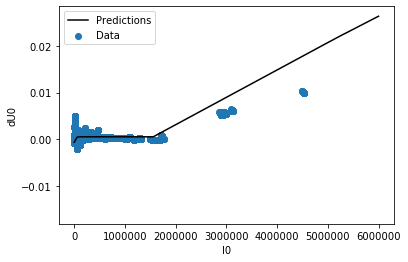

In [29]:
plot_I0(x, y)

In [30]:
test_results = {}

In [31]:
test_results['dnn_I0_model'] = dnn_I0_model.evaluate(
    test_features['res/I0'], test_labels['dU0'],
    verbose=0)

U1 has bad correlation with dU0

In [32]:
U1 = np.array(train_features['res/U1'])
U1_normalizer = layers.Normalization(input_shape=[1,], axis=None)
U1_normalizer.adapt(U1)

In [33]:
dnn_U1_model = build_and_compile_model(U1_normalizer)

In [34]:
%%time
history_dnn_U1 = dnn_U1_model.fit(
    train_features['res/U1'],
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=20)

CPU times: user 2min 21s, sys: 15.6 s, total: 2min 37s
Wall time: 1min 36s


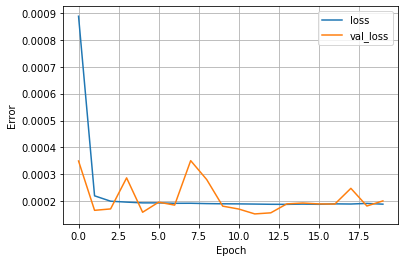

In [35]:
plot_loss(history_dnn_U1)

In [36]:
data['res/U1'].describe()

count    4.950000e+05
mean     3.955016e-05
std      4.930882e-03
min     -1.022402e-01
25%     -3.691386e-07
50%      4.179254e-10
75%      2.799670e-07
max      1.022403e-01
Name: res/U1, dtype: float64

In [37]:
x = tf.linspace(-0.084, 0.084, 101)
y = dnn_U1_model.predict(x)

In [38]:
def plot_U1(x, y):
  plt.scatter(train_features['res/U1'], train_labels['dU0'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('U1')
  plt.ylabel('dU0')
  #plt.ylim([-0.007, 0.04])
  plt.legend()

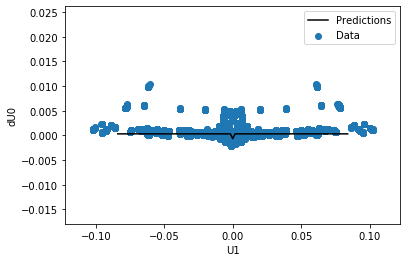

In [39]:
plot_U1(x,y)

In [40]:
test_results['dnn_U1_model'] = dnn_U1_model.evaluate(
    test_features['res/U1'], test_labels['dU0'],
    verbose=0)

In [41]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                5184      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,570
Trainable params: 9,409
Non-trainable params: 161
_________________________________________________________________


In [42]:
%%time
history_dnn = dnn_model.fit(
    train_features,
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=20)

CPU times: user 2min 40s, sys: 19.5 s, total: 3min
Wall time: 1min 42s


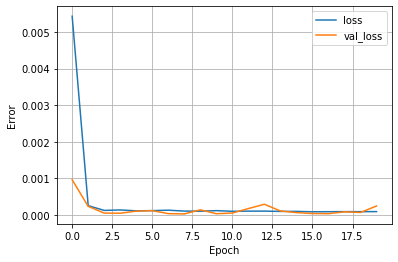

In [43]:
plot_loss(history_dnn)

In [44]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels['dU0'], verbose=0)

In [45]:
pd.DataFrame(test_results, index=['Mean absolute error [dU0]']).T

,Mean absolute error [dU0]
dnn_I0_model,0.000213
dnn_U1_model,0.000200
dnn_model,0.000247


In [46]:
test_predictions = dnn_model.predict(test_features).flatten()

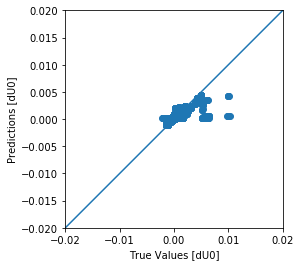

In [47]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels['dU0'], test_predictions)
plt.xlabel('True Values [dU0]')
plt.ylabel('Predictions [dU0]')
lims = [-0.02, 0.02]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

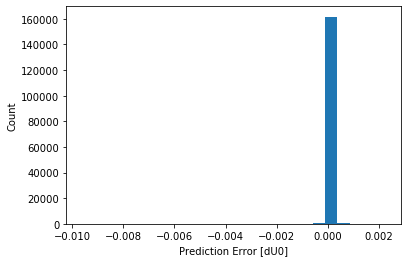

In [48]:
error = test_predictions - test_labels['dU0']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [dU0]')
_ = plt.ylabel('Count')

In [49]:
AE_model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])
AE_model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [50]:
%%time
history_AE = AE_model.fit(
    train_features,
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=20)

CPU times: user 2min 10s, sys: 14.7 s, total: 2min 25s
Wall time: 1min 29s


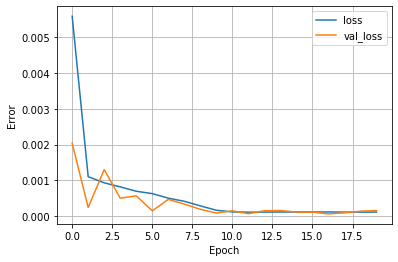

In [51]:
plot_loss(history_AE)

In [52]:
test_results['AE_model'] = AE_model.evaluate(test_features, test_labels['dU0'], verbose=0)

In [53]:
pd.DataFrame(test_results, index=['Mean absolute error [dU0]']).T

,Mean absolute error [dU0]
dnn_I0_model,0.000213
dnn_U1_model,0.000200
dnn_model,0.000247
AE_model,0.000152


In [54]:
N_VALIDATION = len(test_features)
print(N_VALIDATION)
N_TRAIN = len(train_features)
print(N_TRAIN)
BUFFER_SIZE = N_TRAIN
print(BUFFER_SIZE)
BATCH_SIZE = 5000
print(BATCH_SIZE)
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE
print(STEPS_PER_EPOCH)
N_LABELS = len(labels.columns)
print(N_LABELS)

163350
331650
331650
5000
66
5


In [55]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH*10,
    decay_rate=1,
    staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

In [56]:
def compile_and_fit(model, name, optimizer=None, max_epochs=1000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                  loss='mean_absolute_error',
                  metrics=[tf.keras.metrics.MeanAbsoluteError(
                      name='mean_absolute_error')])
                  #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  #metrics=[
                  #    tf.keras.losses.BinaryCrossentropy(
                  #        from_logits=True, name='binary_crossentropy'),
                  #    'accuracy'])

    model.summary()

    history = model.fit(
        train_features,
        train_labels,
        steps_per_epoch = STEPS_PER_EPOCH,
        epochs=max_epochs,
        validation_split=0.2,
        verbose=0)
    return history

In [129]:
full_dnn_model_1 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [130]:
full_architecture_histories = {}

In [131]:
%%time
full_architecture_histories['full_dnn_model_1'] = compile_and_fit(
    full_dnn_model_1,
    'full_dnn_model_1',
    max_epochs=500)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_95 (Dense)            (None, 64)                5184      
                                                                 
 dense_96 (Dense)            (None, 5)                 325       
                                                                 
Total params: 5,670
Trainable params: 5,509
Non-trainable params: 161
_________________________________________________________________
CPU times: user 12min 29s, sys: 50.7 s, total: 13min 20s
Wall time: 6min 58s


In [132]:
full_dnn_model_2 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [133]:
%%time
full_architecture_histories['full_dnn_model_2'] = compile_and_fit(
    full_dnn_model_2,
    'full_dnn_model_2',
    max_epochs=500)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_97 (Dense)            (None, 64)                5184      
                                                                 
 dense_98 (Dense)            (None, 64)                4160      
                                                                 
 dense_99 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9,830
Trainable params: 9,669
Non-trainable params: 161
_________________________________________________________________
CPU times: user 14min 29s, sys: 54.4 s, total: 15min 24s
Wall time: 7min 27s


In [134]:
full_dnn_model_3 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [135]:
%%time
full_architecture_histories['full_dnn_model_3'] = compile_and_fit(
    full_dnn_model_3,
    'full_dnn_model_3',
    max_epochs=500)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_100 (Dense)           (None, 64)                5184      
                                                                 
 dense_101 (Dense)           (None, 64)                4160      
                                                                 
 dense_102 (Dense)           (None, 64)                4160      
                                                                 
 dense_103 (Dense)           (None, 5)                 325       
                                                                 
Total params: 13,990
Trainable params: 13,829
Non-trainable params: 161
_______________________________________________

In [136]:
full_dnn_model_4 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [137]:
%%time
full_architecture_histories['full_dnn_model_4'] = compile_and_fit(
    full_dnn_model_4,
    'full_dnn_model_4',
    max_epochs=500)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_104 (Dense)           (None, 64)                5184      
                                                                 
 dense_105 (Dense)           (None, 64)                4160      
                                                                 
 dense_106 (Dense)           (None, 64)                4160      
                                                                 
 dense_107 (Dense)           (None, 64)                4160      
                                                                 
 dense_108 (Dense)           (None, 5)                 325       
                                                     

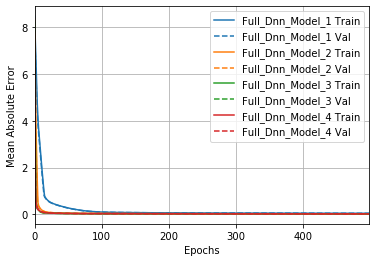

In [138]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories)
#plt.ylim([0., 0.05])

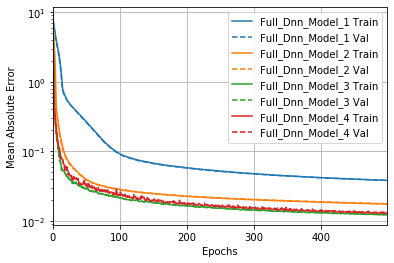

In [139]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories)
plt.yscale('log')

(0.0, 0.05)

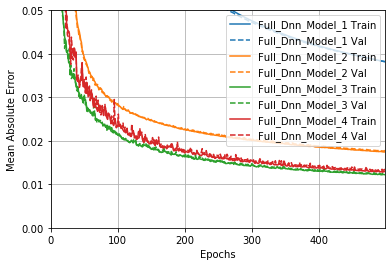

In [140]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories)
plt.ylim([0., 0.05])

In [141]:
full_architecture_histories_l1 = {}

In [142]:
full_dnn_model_1_l1 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(N_LABELS)
])

In [143]:
%%time
full_architecture_histories_l1['full_dnn_model_1_l1'] = compile_and_fit(
    full_dnn_model_1_l1,
    'full_dnn_model_1_l1',
    max_epochs=500)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_109 (Dense)           (None, 64)                5184      
                                                                 
 dense_110 (Dense)           (None, 5)                 325       
                                                                 
Total params: 5,670
Trainable params: 5,509
Non-trainable params: 161
_________________________________________________________________
CPU times: user 12min 57s, sys: 52.5 s, total: 13min 49s
Wall time: 7min 12s


In [144]:
full_dnn_model_2_l1 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(N_LABELS)
])

In [145]:
%%time
full_architecture_histories_l1['full_dnn_model_2_l1'] = compile_and_fit(
    full_dnn_model_2_l1,
    'full_dnn_model_2_l1',
    max_epochs=500)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_111 (Dense)           (None, 64)                5184      
                                                                 
 dense_112 (Dense)           (None, 64)                4160      
                                                                 
 dense_113 (Dense)           (None, 5)                 325       
                                                                 
Total params: 9,830
Trainable params: 9,669
Non-trainable params: 161
_________________________________________________________________
CPU times: user 15min 4s, sys: 1min, total: 16min 5s
Wall time: 7min 39s


In [146]:
full_dnn_model_3_l1 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(N_LABELS)
])

In [147]:
%%time
full_architecture_histories_l1['full_dnn_model_3_l1'] = compile_and_fit(
    full_dnn_model_3_l1,
    'full_dnn_model_3_l1',
    max_epochs=500)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_114 (Dense)           (None, 64)                5184      
                                                                 
 dense_115 (Dense)           (None, 64)                4160      
                                                                 
 dense_116 (Dense)           (None, 64)                4160      
                                                                 
 dense_117 (Dense)           (None, 5)                 325       
                                                                 
Total params: 13,990
Trainable params: 13,829
Non-trainable params: 161
_______________________________________________

In [148]:
full_dnn_model_4_l1 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(N_LABELS)
])

In [149]:
%%time
full_architecture_histories_l1['full_dnn_model_4_l1'] = compile_and_fit(
    full_dnn_model_4_l1,
    'full_dnn_model_4_l1',
    max_epochs=500)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_118 (Dense)           (None, 64)                5184      
                                                                 
 dense_119 (Dense)           (None, 64)                4160      
                                                                 
 dense_120 (Dense)           (None, 64)                4160      
                                                                 
 dense_121 (Dense)           (None, 64)                4160      
                                                                 
 dense_122 (Dense)           (None, 5)                 325       
                                                     

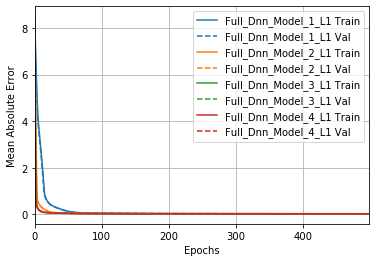

In [150]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l1)
#plt.ylim([0., 0.05])

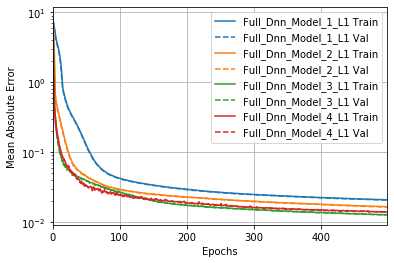

In [151]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l1)
plt.yscale('log')

(0.0, 0.05)

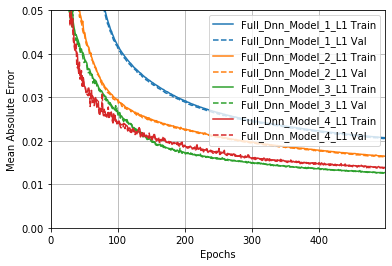

In [152]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l1)
plt.ylim([0., 0.05])

In [153]:
full_dnn_model_1_l2 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(N_LABELS)
])

In [154]:
full_architecture_histories_l2 = {}

In [155]:
%%time
full_architecture_histories_l2['full_dnn_model_1_l2'] = compile_and_fit(
    full_dnn_model_1_l2,
    'full_dnn_model_1_l2',
    max_epochs=500)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_123 (Dense)           (None, 64)                5184      
                                                                 
 dense_124 (Dense)           (None, 5)                 325       
                                                                 
Total params: 5,670
Trainable params: 5,509
Non-trainable params: 161
_________________________________________________________________
CPU times: user 12min 40s, sys: 50.8 s, total: 13min 30s
Wall time: 7min


In [156]:
full_dnn_model_2_l2 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(N_LABELS)
])

In [157]:
%%time
full_architecture_histories_l2['full_dnn_model_2_l2'] = compile_and_fit(
    full_dnn_model_2_l2,
    'full_dnn_model_2_l2',
    max_epochs=500)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_125 (Dense)           (None, 64)                5184      
                                                                 
 dense_126 (Dense)           (None, 64)                4160      
                                                                 
 dense_127 (Dense)           (None, 5)                 325       
                                                                 
Total params: 9,830
Trainable params: 9,669
Non-trainable params: 161
_________________________________________________________________
CPU times: user 15min 3s, sys: 59 s, total: 16min 2s
Wall time: 7min 39s


In [158]:
full_dnn_model_3_l2 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(N_LABELS)
])

In [159]:
%%time
full_architecture_histories_l2['full_dnn_model_3_l2'] = compile_and_fit(
    full_dnn_model_3_l2,
    'full_dnn_model_3_l2',
    max_epochs=500)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_128 (Dense)           (None, 64)                5184      
                                                                 
 dense_129 (Dense)           (None, 64)                4160      
                                                                 
 dense_130 (Dense)           (None, 64)                4160      
                                                                 
 dense_131 (Dense)           (None, 5)                 325       
                                                                 
Total params: 13,990
Trainable params: 13,829
Non-trainable params: 161
_______________________________________________

In [160]:
full_dnn_model_4_l2 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(N_LABELS)
])

In [161]:
%%time
full_architecture_histories_l2['full_dnn_model_4_l2'] = compile_and_fit(
    full_dnn_model_4_l2,
    'full_dnn_model_4_l2',
    max_epochs=500)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_132 (Dense)           (None, 64)                5184      
                                                                 
 dense_133 (Dense)           (None, 64)                4160      
                                                                 
 dense_134 (Dense)           (None, 64)                4160      
                                                                 
 dense_135 (Dense)           (None, 64)                4160      
                                                                 
 dense_136 (Dense)           (None, 5)                 325       
                                                     

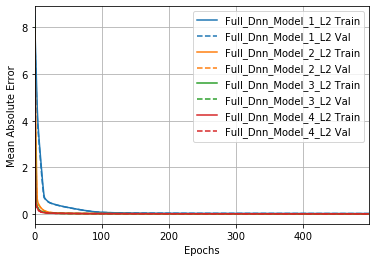

In [162]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l2)
#plt.ylim([0., 0.05])

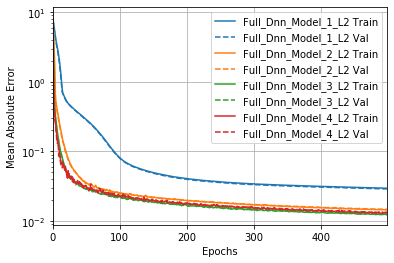

In [163]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l2)
plt.yscale('log')

(0.0, 0.05)

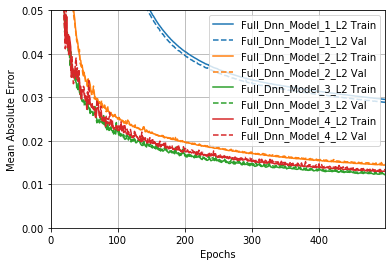

In [164]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l2)
plt.ylim([0., 0.05])

In [165]:
full_dnn_model_1_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [166]:
full_architecture_histories_do = {}

In [167]:
%%time
full_architecture_histories_do['full_dnn_model_1_do'] = compile_and_fit(
    full_dnn_model_1_do,
    'full_dnn_model_1_do',
    max_epochs=500)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_137 (Dense)           (None, 64)                5184      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_138 (Dense)           (None, 5)                 325       
                                                                 
Total params: 5,670
Trainable params: 5,509
Non-trainable params: 161
_________________________________________________________________
CPU times: user 14min 6s, sys: 51.4 s, total: 14min 57s
Wall time: 7min 7s


In [168]:
full_dnn_model_2_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [169]:
%%time
full_architecture_histories_do['full_dnn_model_2_do'] = compile_and_fit(
    full_dnn_model_2_do,
    'full_dnn_model_2_do',
    max_epochs=500)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_139 (Dense)           (None, 64)                5184      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_140 (Dense)           (None, 64)                4160      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_141 (Dense)           (None, 5)                 325       
                                                     

In [170]:
full_dnn_model_3_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [171]:
%%time
full_architecture_histories_do['full_dnn_model_3_do'] = compile_and_fit(
    full_dnn_model_3_do,
    'full_dnn_model_3_do',
    max_epochs=500)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_142 (Dense)           (None, 64)                5184      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_143 (Dense)           (None, 64)                4160      
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_144 (Dense)           (None, 64)                4160      
                                                     

In [172]:
full_dnn_model_4_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [173]:
%%time
full_architecture_histories_do['full_dnn_model_4_do'] = compile_and_fit(
    full_dnn_model_4_do,
    'full_dnn_model_4_do',
    max_epochs=500)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_146 (Dense)           (None, 64)                5184      
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_147 (Dense)           (None, 64)                4160      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_148 (Dense)           (None, 64)                4160      
                                                     

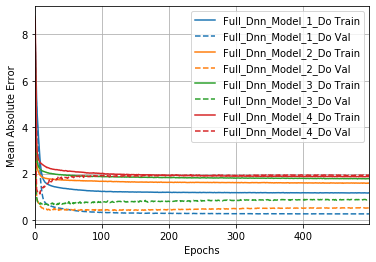

In [174]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_do)
#plt.ylim([0., 0.05])

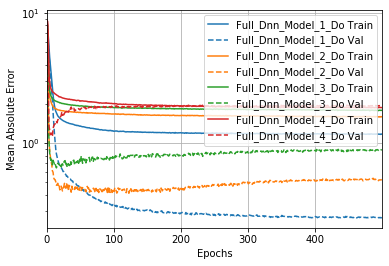

In [175]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_do)
plt.yscale('log')

(0.0, 0.05)

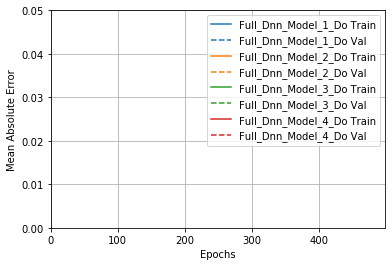

In [176]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_do)
plt.ylim([0., 0.05])

In [177]:
full_dnn_model_1_l1_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [178]:
full_architecture_histories_l1_do = {}

In [179]:
%%time
full_architecture_histories_l1_do['full_dnn_model_1_l1_do'] = compile_and_fit(
    full_dnn_model_1_l1_do,
    'full_dnn_model_1_l1_do',
    max_epochs=500)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_151 (Dense)           (None, 64)                5184      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_152 (Dense)           (None, 5)                 325       
                                                                 
Total params: 5,670
Trainable params: 5,509
Non-trainable params: 161
_________________________________________________________________
CPU times: user 14min 18s, sys: 53.9 s, total: 15min 12s
Wall time: 7min 11s


In [180]:
full_dnn_model_2_l1_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [181]:
%%time
full_architecture_histories_l1_do['full_dnn_model_2_l1_do'] = compile_and_fit(
    full_dnn_model_2_l1_do,
    'full_dnn_model_2_l1_do',
    max_epochs=500)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_153 (Dense)           (None, 64)                5184      
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_154 (Dense)           (None, 64)                4160      
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_155 (Dense)           (None, 5)                 325       
                                                     

In [182]:
full_dnn_model_3_l1_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [183]:
%%time
full_architecture_histories_l1_do['full_dnn_model_3_l1_do'] = compile_and_fit(
    full_dnn_model_3_l1_do,
    'full_dnn_model_3_l1_do',
    max_epochs=500)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_156 (Dense)           (None, 64)                5184      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_157 (Dense)           (None, 64)                4160      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_158 (Dense)           (None, 64)                4160      
                                                     

In [184]:
full_dnn_model_4_l1_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [185]:
%%time
full_architecture_histories_l1_do['full_dnn_model_4_l1_do'] = compile_and_fit(
    full_dnn_model_4_l1_do,
    'full_dnn_model_4_l1_do',
    max_epochs=500)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_160 (Dense)           (None, 64)                5184      
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_161 (Dense)           (None, 64)                4160      
                                                                 
 dropout_47 (Dropout)        (None, 64)                0         
                                                                 
 dense_162 (Dense)           (None, 64)                4160      
                                                     

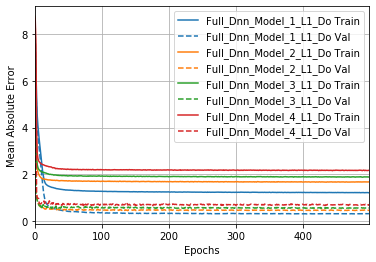

In [186]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l1_do)
#plt.ylim([0., 0.05])

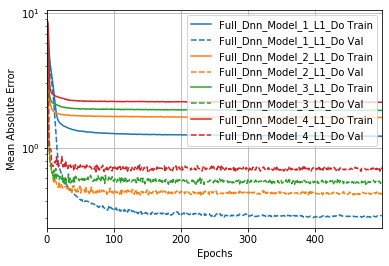

In [187]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l1_do)
plt.yscale('log')

(0.0, 0.05)

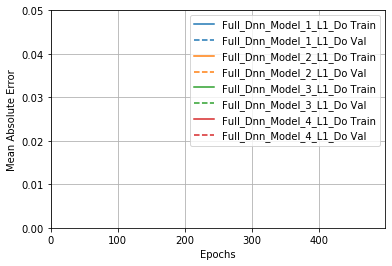

In [188]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l1_do)
plt.ylim([0., 0.05])

In [189]:
full_dnn_model_1_l2_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [190]:
full_architecture_histories_l2_do = {}

In [191]:
%%time
full_architecture_histories_l2_do['full_dnn_model_1_l2_do'] = compile_and_fit(
    full_dnn_model_1_l2_do,
    'full_dnn_model_1_l2_do',
    max_epochs=500)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_165 (Dense)           (None, 64)                5184      
                                                                 
 dropout_50 (Dropout)        (None, 64)                0         
                                                                 
 dense_166 (Dense)           (None, 5)                 325       
                                                                 
Total params: 5,670
Trainable params: 5,509
Non-trainable params: 161
_________________________________________________________________
CPU times: user 14min 28s, sys: 53.8 s, total: 15min 22s
Wall time: 7min 16s


In [192]:
full_dnn_model_2_l2_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [193]:
%%time
full_architecture_histories_l2_do['full_dnn_model_2_l2_do'] = compile_and_fit(
    full_dnn_model_2_l2_do,
    'full_dnn_model_2_l2_do',
    max_epochs=500)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_167 (Dense)           (None, 64)                5184      
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_168 (Dense)           (None, 64)                4160      
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_169 (Dense)           (None, 5)                 325       
                                                     

In [194]:
full_dnn_model_3_l2_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [195]:
%%time
full_architecture_histories_l2_do['full_dnn_model_3_l2_do'] = compile_and_fit(
    full_dnn_model_3_l2_do,
    'full_dnn_model_3_l2_do',
    max_epochs=500)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_170 (Dense)           (None, 64)                5184      
                                                                 
 dropout_53 (Dropout)        (None, 64)                0         
                                                                 
 dense_171 (Dense)           (None, 64)                4160      
                                                                 
 dropout_54 (Dropout)        (None, 64)                0         
                                                                 
 dense_172 (Dense)           (None, 64)                4160      
                                                     

In [196]:
full_dnn_model_4_l2_do = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS)
])

In [197]:
%%time
full_architecture_histories_l2_do['full_dnn_model_4_l2_do'] = compile_and_fit(
    full_dnn_model_4_l2_do,
    'full_dnn_model_4_l2_do',
    max_epochs=500)

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80)               161       
 n)                                                              
                                                                 
 dense_174 (Dense)           (None, 64)                5184      
                                                                 
 dropout_56 (Dropout)        (None, 64)                0         
                                                                 
 dense_175 (Dense)           (None, 64)                4160      
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_176 (Dense)           (None, 64)                4160      
                                                     

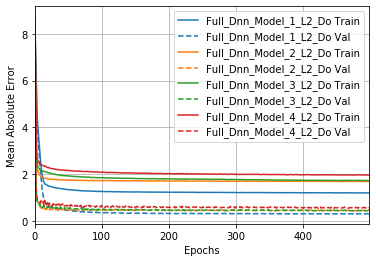

In [198]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l2_do)
#plt.ylim([0., 0.05])

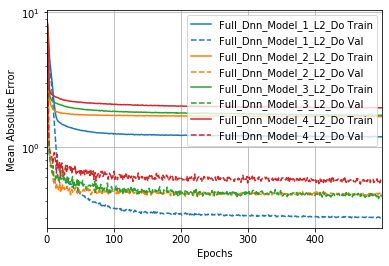

In [199]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l2_do)
plt.yscale('log')

(0.0, 0.05)

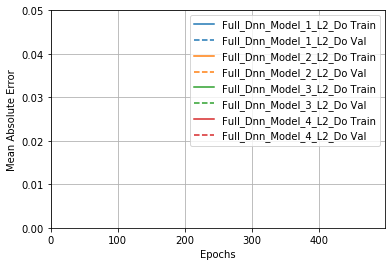

In [200]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(full_architecture_histories_l2_do)
plt.ylim([0., 0.05])

In [207]:
full_dnn_models = {}
full_dnn_models['full_dnn_model_1'] = full_dnn_model_1.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_2'] = full_dnn_model_2.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_3'] = full_dnn_model_3.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_4'] = full_dnn_model_4.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_1_do'] = full_dnn_model_1_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_2_do'] = full_dnn_model_2_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_3_do'] = full_dnn_model_3_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_4_do'] = full_dnn_model_4_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_1_l1'] = full_dnn_model_1_l1.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_2_l1'] = full_dnn_model_2_l1.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_3_l1'] = full_dnn_model_3_l1.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_4_l1'] = full_dnn_model_4_l1.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_1_l2'] = full_dnn_model_1_l2.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_2_l2'] = full_dnn_model_2_l2.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_3_l2'] = full_dnn_model_3_l2.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_4_l2'] = full_dnn_model_4_l2.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_1_l1_do'] = full_dnn_model_1_l1_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_2_l1_do'] = full_dnn_model_2_l1_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_3_l1_do'] = full_dnn_model_3_l1_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_4_l1_do'] = full_dnn_model_4_l1_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_1_l2_do'] = full_dnn_model_1_l2_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_2_l2_do'] = full_dnn_model_2_l2_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_3_l2_do'] = full_dnn_model_3_l2_do.evaluate(
    test_features,
    test_labels,
    verbose=0)
full_dnn_models['full_dnn_model_4_l2_do'] = full_dnn_model_4_l2_do.evaluate(
    test_features,
    test_labels,
    verbose=0)

In [208]:
pd.DataFrame(full_dnn_models).T

,0,1
full_dnn_model_1,0.038111,0.038111
full_dnn_model_2,0.017822,0.017822
full_dnn_model_3,0.012502,0.012502
full_dnn_model_4,0.013088,0.013088
full_dnn_model_1_do,0.269481,0.269481
full_dnn_model_2_do,0.524863,0.524863
full_dnn_model_3_do,0.884436,0.884436
full_dnn_model_4_do,1.921726,1.921726
full_dnn_model_1_l1,0.169726,0.020172
full_dnn_model_2_l1,0.282728,0.016627
